<a href="https://colab.research.google.com/github/rubasankar/DL-LAB/blob/main/4_Transfer_learning_and_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [ ]:
train_ds, test_ds = cifar10.load_data()
split = int(train_ds[0].shape[0]*.8)
train_ds,val_ds = (train_ds[0][:split],train_ds[1][:split]),(train_ds[0][split:],train_ds[1][split:])

In [ ]:
data_augumentation = tf.keras.Sequential([
    tfl.Resizing(32,32),
    tfl.Rescaling(1./255),
    tfl.RandomFlip(mode="horizontal"),
    tfl.RandomRotation(factor=.2),
    tfl.RandomZoom(height_factor=.1,width_factor=.1),
    tfl.RandomContrast(factor=(.2,.8))
])

def preprocess(x,y):
    return data_augumentation(x), tf.one_hot(tf.squeeze(y),10)

train_ds = tf.data.Dataset.from_tensor_slices(train_ds).map(preprocess).batch(64)
val_ds = tf.data.Dataset.from_tensor_slices(val_ds).map(preprocess).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices(test_ds).map(preprocess).batch(64)

In [ ]:
base_model = tf.keras.applications.VGG16(include_top=False,weights='imagenet',input_shape=(32,32,3))

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
base_model.trainable=False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tfl.Flatten(),
    tfl.Dense(256,activation="relu"),
    tfl.Dense(128,activation="relu"),
    tfl.Dense(64,activation="relu"),
    tfl.Dense(32,activation="relu"),
    tfl.Dense(10,activation = "softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)               

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)               

In [ ]:
len(model.trainable_variables)

10

In [ ]:
initial_epochs = 5
loss0, accuracy0 = model.evaluate(val_ds)

157/157 [==============================] - 22s 95ms/step - loss: 2.3261 - accuracy: 0.0905


In [ ]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

Epoch 1/5
625/625 [==============================] - 55s 87ms/step - loss: 1.6850 - accuracy: 0.3970 - val_loss: 1.5553 - val_accuracy: 0.4445
Epoch 2/5
625/625 [==============================] - 54s 86ms/step - loss: 1.4962 - accuracy: 0.4701 - val_loss: 1.4712 - val_accuracy: 0.4775
Epoch 3/5
625/625 [==============================] - 55s 88ms/step - loss: 1.4436 - accuracy: 0.4886 - val_loss: 1.4521 - val_accuracy: 0.4887
Epoch 4/5
625/625 [==============================] - 55s 89ms/step - loss: 1.4051 - accuracy: 0.5045 - val_loss: 1.4344 - val_accuracy: 0.4937
Epoch 5/5
625/625 [==============================] - 55s 88ms/step - loss: 1.3787 - accuracy: 0.5137 - val_loss: 1.4098 - val_accuracy: 0.5061


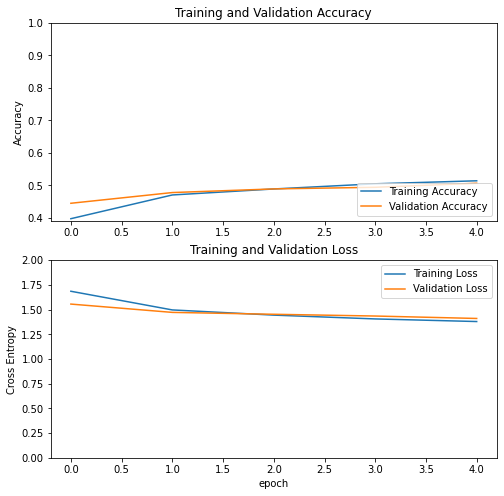

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 15

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  19


In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001/10),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)               

In [ ]:
len(model.trainable_variables)

16

In [ ]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)

Epoch 5/10
625/625 [==============================] - 62s 98ms/step - loss: 1.3235 - accuracy: 0.5380 - val_loss: 1.2503 - val_accuracy: 0.5655
Epoch 6/10
625/625 [==============================] - 60s 96ms/step - loss: 1.1517 - accuracy: 0.5973 - val_loss: 1.1408 - val_accuracy: 0.6002
Epoch 7/10
625/625 [==============================] - 61s 98ms/step - loss: 1.0741 - accuracy: 0.6267 - val_loss: 1.1212 - val_accuracy: 0.6109
Epoch 8/10
625/625 [==============================] - 60s 96ms/step - loss: 1.0191 - accuracy: 0.6439 - val_loss: 1.0437 - val_accuracy: 0.6388
Epoch 9/10
625/625 [==============================] - 59s 95ms/step - loss: 0.9741 - accuracy: 0.6580 - val_loss: 1.0356 - val_accuracy: 0.6400
Epoch 10/10
625/625 [==============================] - 64s 103ms/step - loss: 0.9379 - accuracy: 0.6715 - val_loss: 1.0476 - val_accuracy: 0.6434


In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

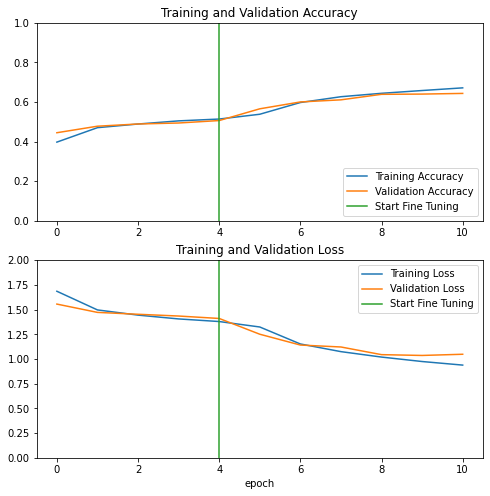

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 2.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)

157/157 [==============================] - 11s 70ms/step - loss: 1.0543 - accuracy: 0.6337
Test accuracy : 0.6337000131607056
